## PA Position Feature Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


import csv ,os
import pandas as pd
path_PA = '/content/drive/Shareddrives/ECS 289G Deep Learning Project/Project/Datasets/csv files/with_sampling_index_csv/df_PA.csv'

# id 1 effusion, 10 nodule, 11 infiltration, 12 fibrosis, 14 cardiomegaly, 24 no finding, 25 Atelectasis,46 emphysema, 57 pleural thickening,59 mass,120 pneumothorax, 125 consolidation, 1068 Edema, 1312 pneumonia, 1729 Hernia
df = pd.read_csv(path_PA)

# new index of dataframe will be sample #
df_new = df.set_index('Sample #')

# key is the sample number in df_PA dataset. Value in dictionary is the third followup disease in the sample set 
disease_dict = {   
    1    : 'Effusion', 
    10   : 'Nodule', 
    11   : 'Infiltration', 
    12   : 'Fibrosis', 
    14   : 'Cardiomegaly', 
    24   : 'No finding', 
    25   : 'Atelectasis',
    46   : 'Emphysema', 
    57   : 'Pleural_Thickening',
    59   : 'Mass',
    120  : 'Pneumothorax', 
    125  : 'Consolidation', 
    1068 : 'Edema', 
    1312 : 'Pneumonia', 
    1729 : 'Hernia' 
}

pd.set_option('max_rows', 99999)
# contains rows for PA sample set for 15 unique label sets
df_disease= pd.DataFrame(columns=df_new.columns)
for key,value in disease_dict.items():
  df_disease = df_disease.append(df_new.loc[key,:])
df_disease.to_csv('df_disease_PA.csv',na_rep='=NA()')

           Image Index  ...        y]
1     00000001_000.png  ...  0.143000
1     00000001_001.png  ...  0.143000
1     00000001_002.png  ...  0.168000
10    00000008_000.png  ...  0.171000
10    00000008_001.png  ...  0.171000
10    00000008_002.png  ...  0.168000
11    00000020_000.png  ...  0.143000
11    00000020_001.png  ...  0.143000
11    00000020_002.png  ...  0.143000
12    00000020_000.png  ...  0.143000
12    00000020_001.png  ...  0.143000
12    00000020_002.png  ...  0.143000
14    00000044_000.png  ...  0.194311
14    00000044_001.png  ...  0.139000
14    00000044_002.png  ...  0.139000
24    00000067_000.png  ...  0.143000
24    00000067_001.png  ...  0.143000
24    00000067_002.png  ...  0.143000
25    00000086_000.png  ...  0.194311
25    00000086_001.png  ...  0.171000
25    00000086_002.png  ...  0.171000
46    00000131_000.png  ...  0.143000
46    00000131_001.png  ...  0.194311
46    00000131_002.png  ...  0.168000
57    00000132_003.png  ...  0.168000
57    000001

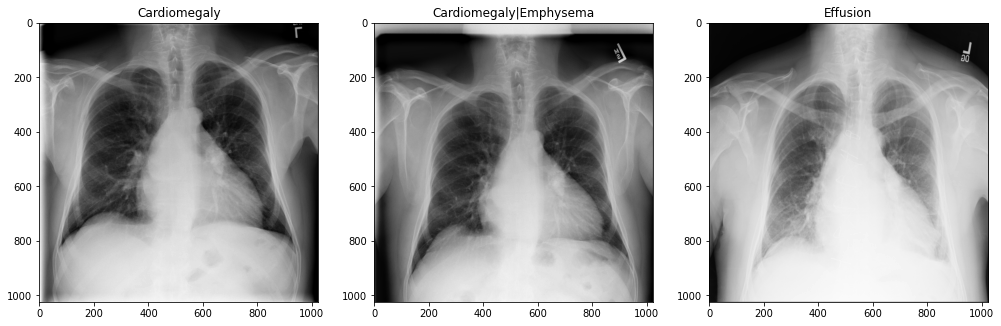

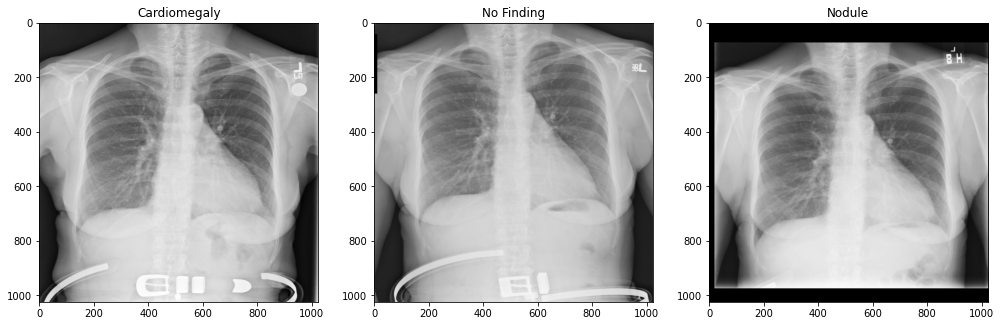

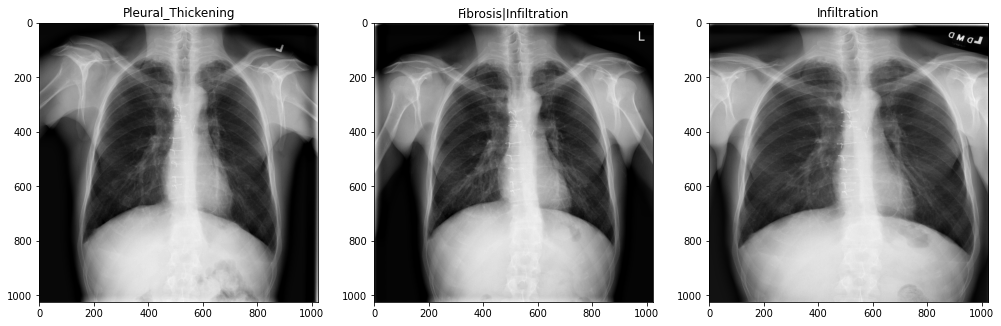

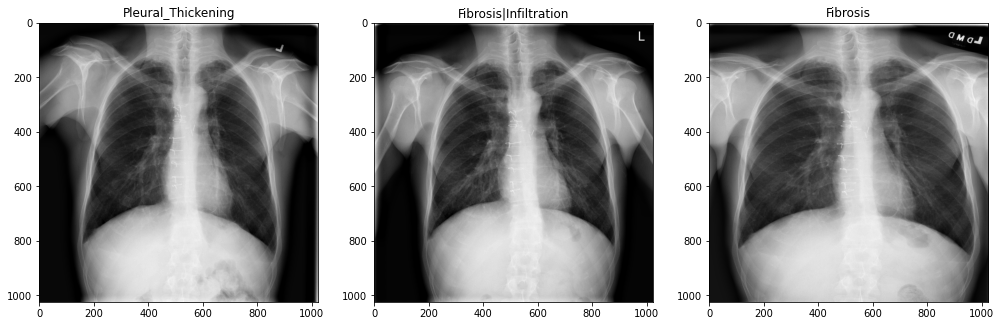

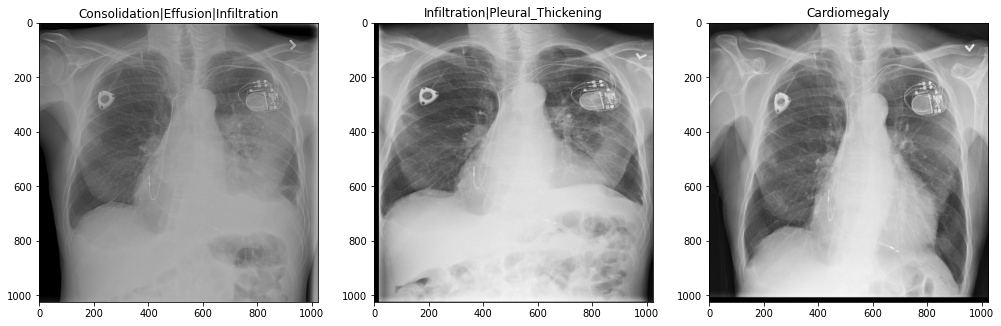

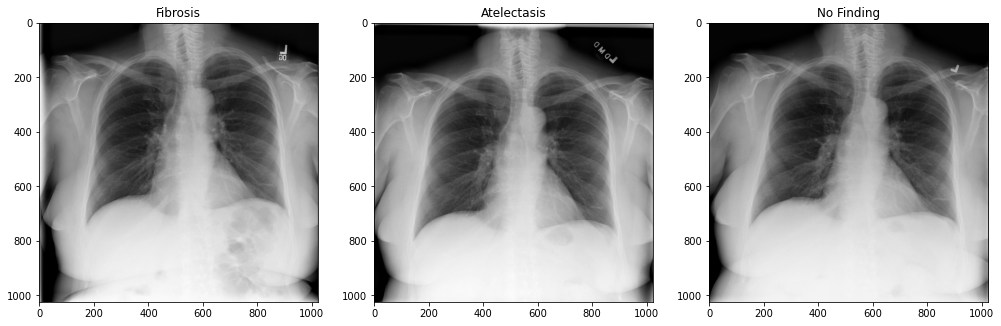

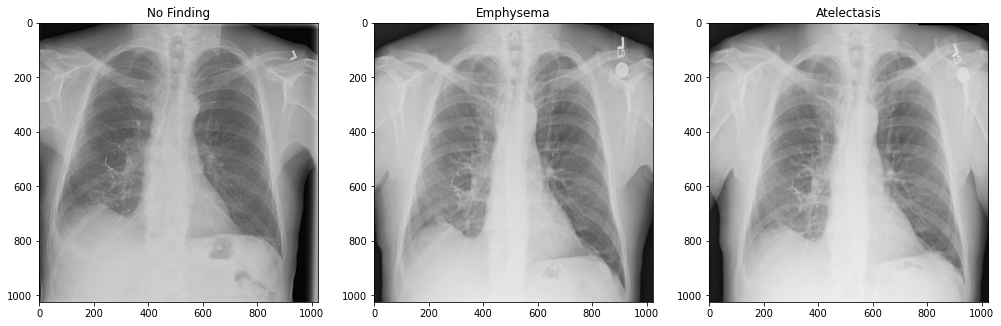

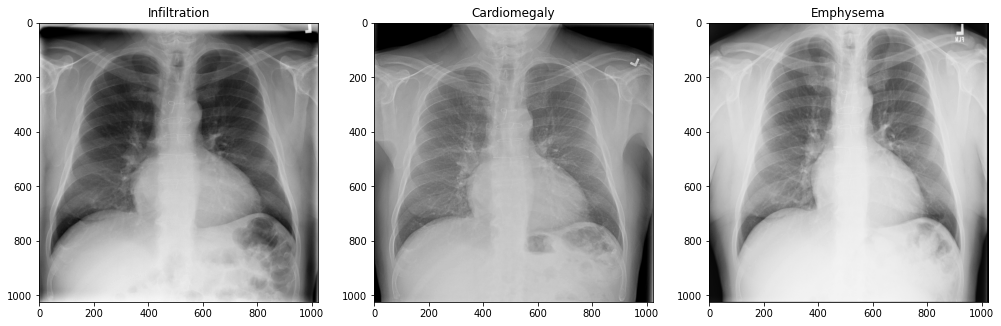

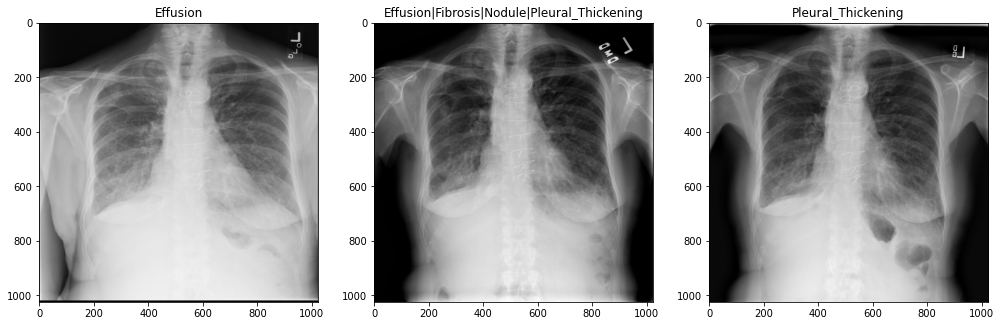

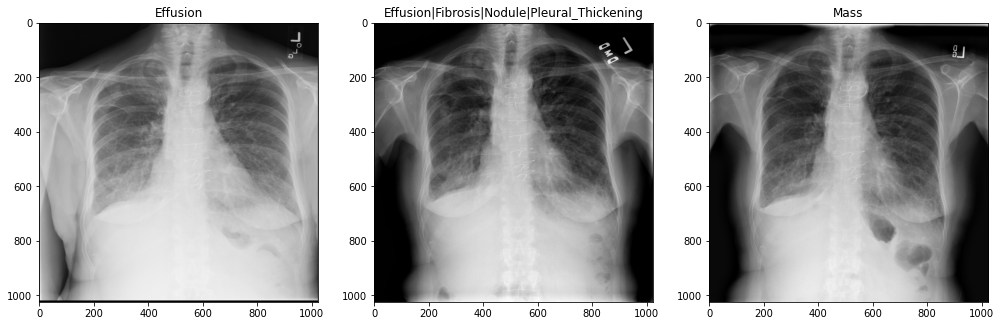

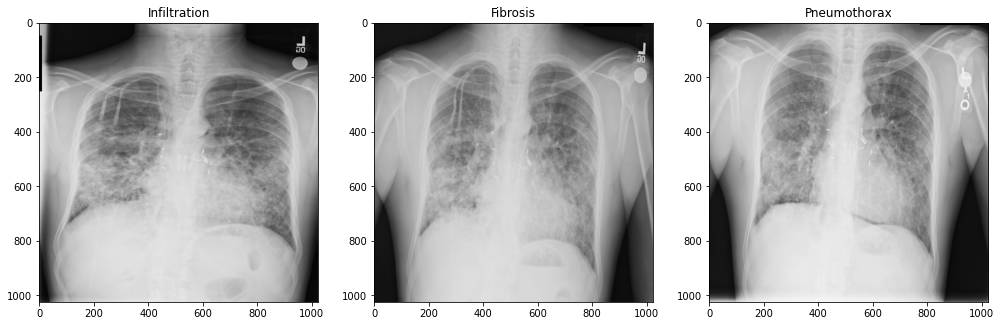

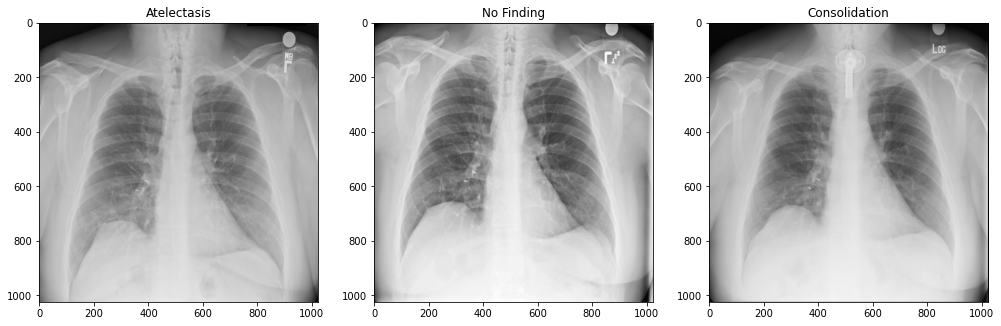

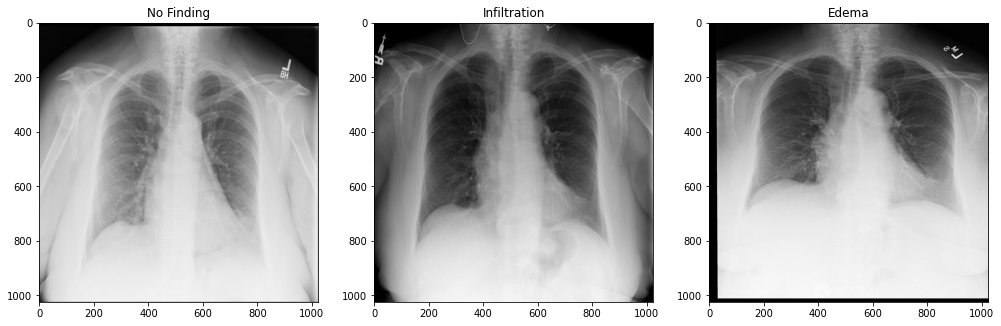

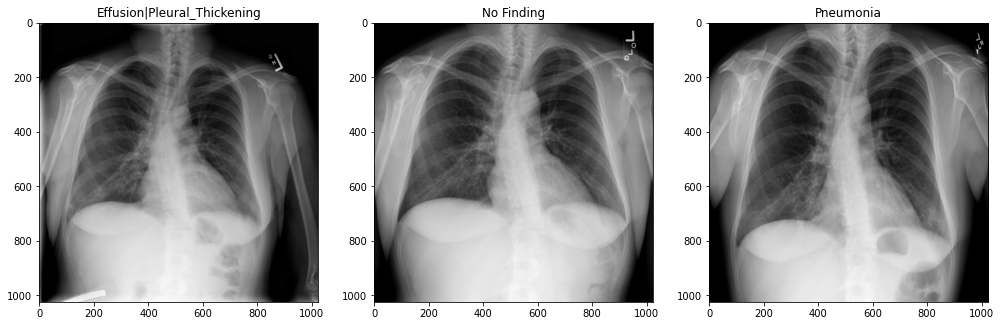

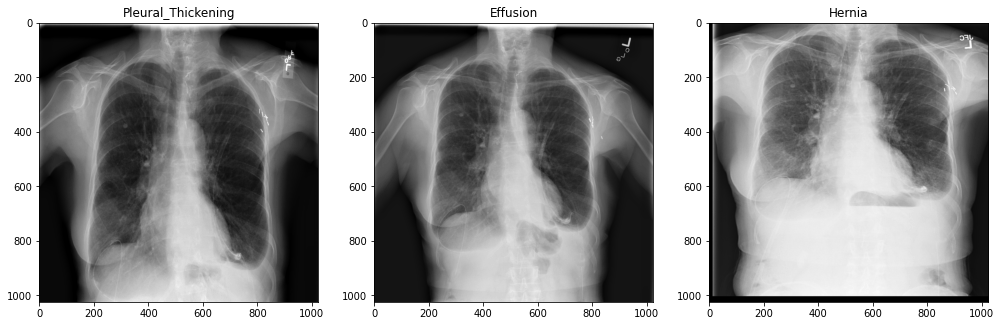

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# Credits to https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython
images1,images2 = 0,0
pd.set_option('max_rows', 99999)
# figure size in inches optional
rcParams['figure.figsize'] = 17 ,14
df_disease.reset_index(inplace = True, drop = True)
paths_array = []
finding_labels = []
count = 0

# Read in the 15 Sample sets with different labels and show the images in the same set side by side 
for index, row in df_disease.iterrows():
  path_images = '/content/drive/Shareddrives/ECS 289G Deep Learning Project/Project/Datasets/images'
  for folder in range(12):
    try:
      path = path_images + '/images' + str(folder+1)+'/'
      fake = mpimg.imread (path + row['Image Index'])
      finding_labels.append(row['Finding Labels'])
      paths_array.append(path + row['Image Index'])
      count += 1
      if count == 3:
        # read images
        img_A = mpimg.imread(paths_array[0])
        img_B = mpimg.imread(paths_array[1])
        img_C = mpimg.imread(paths_array[2])
        # display images
        fig, ax = plt.subplots(1,3)
        ax[0].set_title(finding_labels[0])
        ax[0].imshow(img_A,cmap='gray');
        ax[1].set_title(finding_labels[1])
        ax[1].imshow(img_B,cmap='gray');
        ax[2].set_title(finding_labels[2])
        ax[2].imshow(img_C,cmap='gray');
        paths_array = []
        finding_labels = []
        count = 0
      
    except:
      continue




## AP Positions

In [ ]:
import csv ,os
import pandas as pd
path_AP = '/content/drive/Shareddrives/ECS 289G Deep Learning Project/Project/Datasets/csv files/with_sampling_index_csv/df_AP.csv'

# id 1 effusion, 10 nodule, 11 infiltration, 12 fibrosis, 14 cardiomegaly, 24 no finding, 25 Atelectasis,46 emphysema, 57 pleural thickening,59 mass,120 pneumothorax, 125 consolidation, 1068 Edema, 1312 pneumonia, 1729 Hernia
df = pd.read_csv(path_AP)

# new index of dataframe will be sample #
df_new = df.set_index('Sample #')

# key is the sample number in df_PA dataset. Value in dictionary is the third followup disease in the sample set 
disease_dict = {   
    9    : 'Effusion', 
    157  : 'Nodule', 
    8    : 'Infiltration', 
    207  : 'Fibrosis', 
    1766 : 'Cardiomegaly', 
    1508 : 'No finding', 
    1550 : 'Atelectasis',
    2384 : 'Emphysema', 
    152  : 'Pleural_Thickening',
    179  : 'Mass',
    1219 : 'Pneumothorax', 
    18   : 'Consolidation', 
    19   : 'Edema', 
    20   : 'Pneumonia'
    # 1729 : 'Hernia' there is only 1 Hernia case in All of the AP positions
}

pd.set_option('max_rows', 99999)
# contains rows for AP sample set for 14 unique labels sets
df_disease= pd.DataFrame(columns=df_new.columns)
for key,value in disease_dict.items():
  df_disease = df_disease.append(df_new.loc[key,:])

df_disease.to_csv('df_disease_AP.csv',na_rep='=NA()')

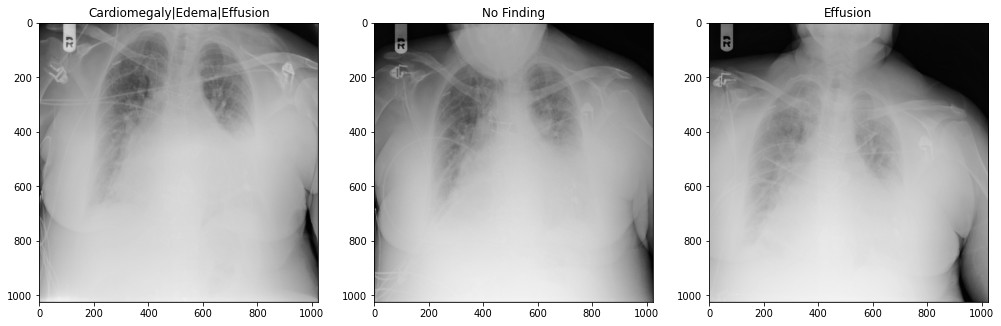

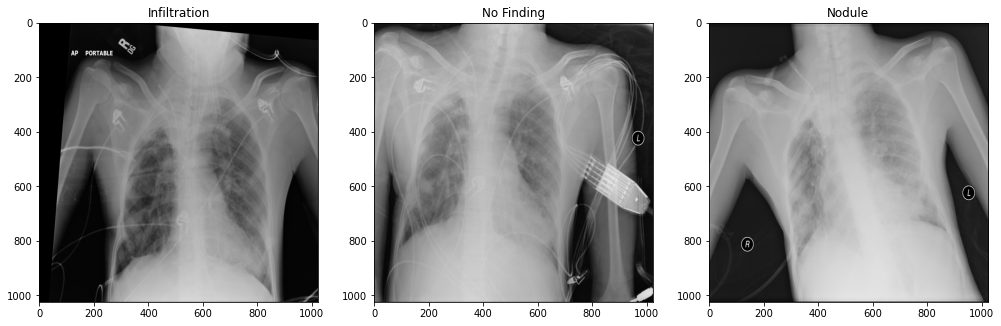

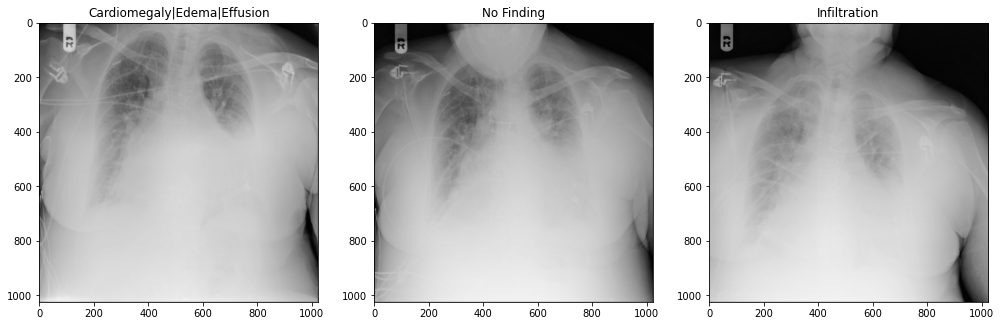

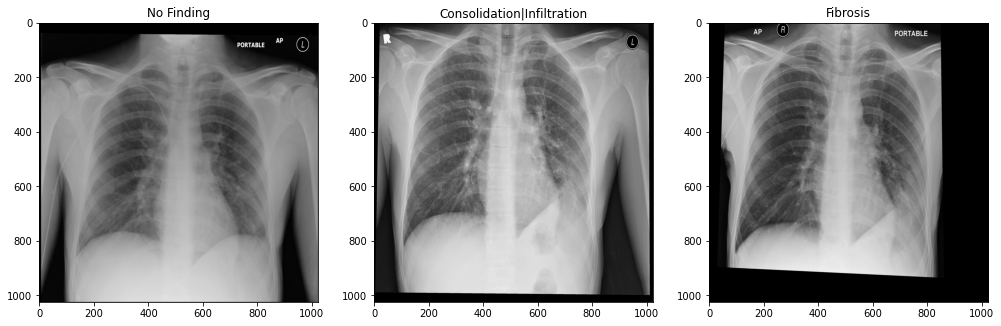

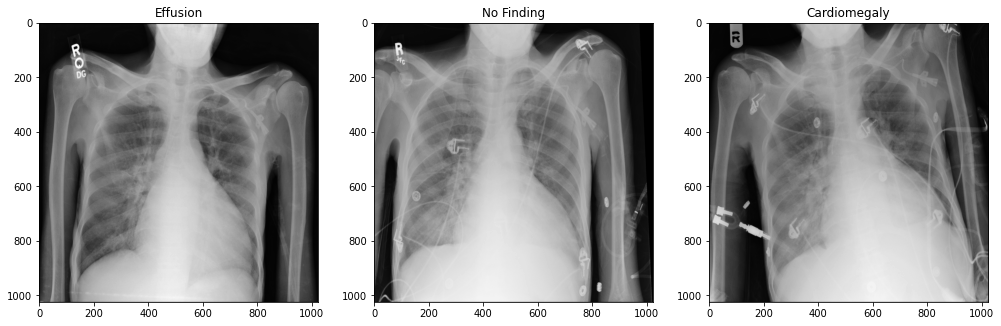

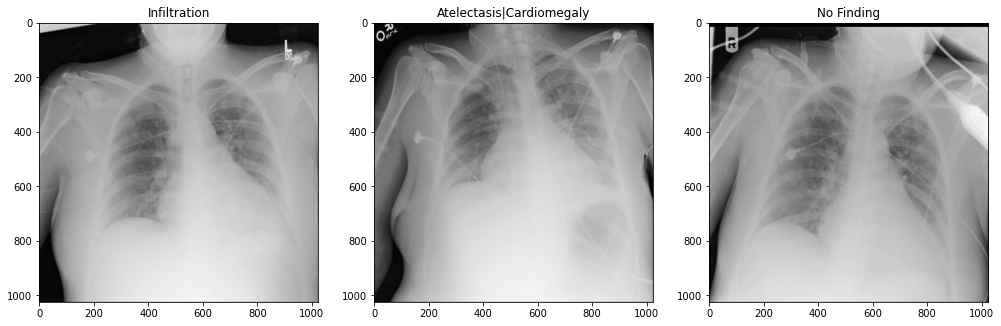

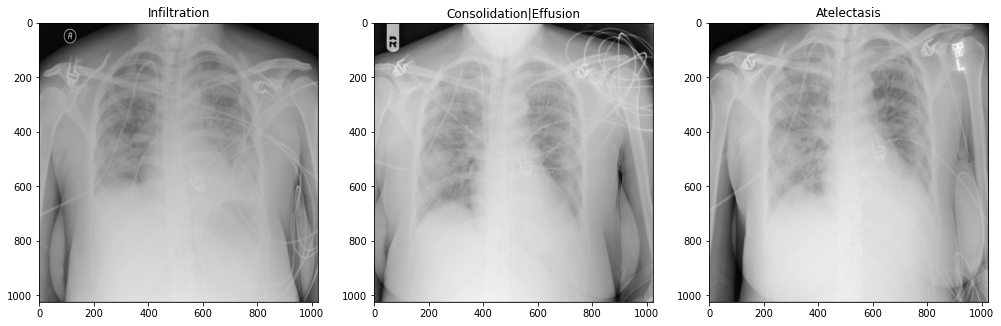

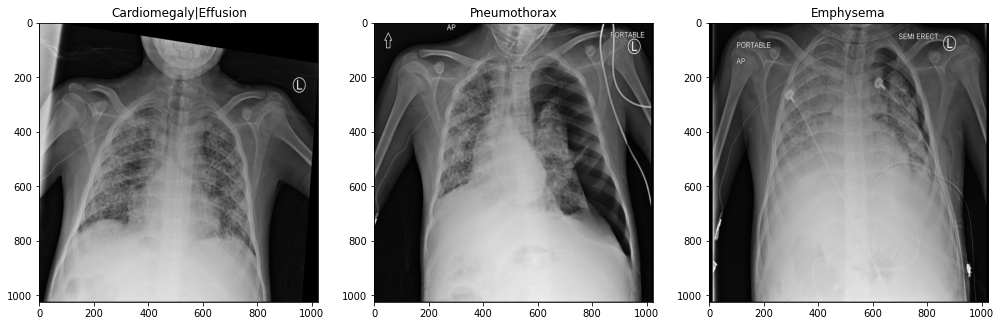

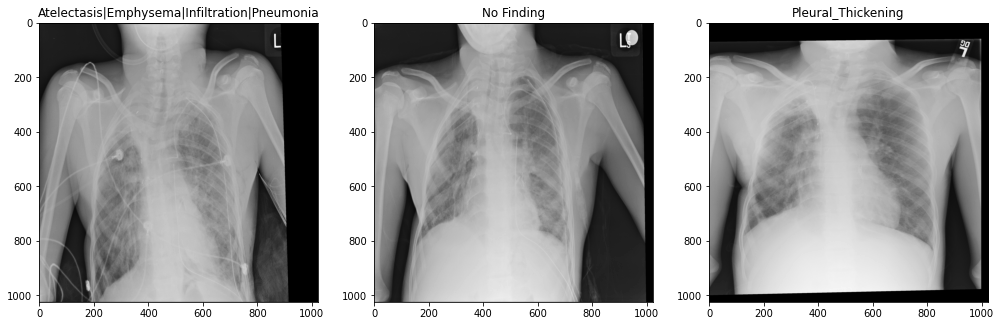

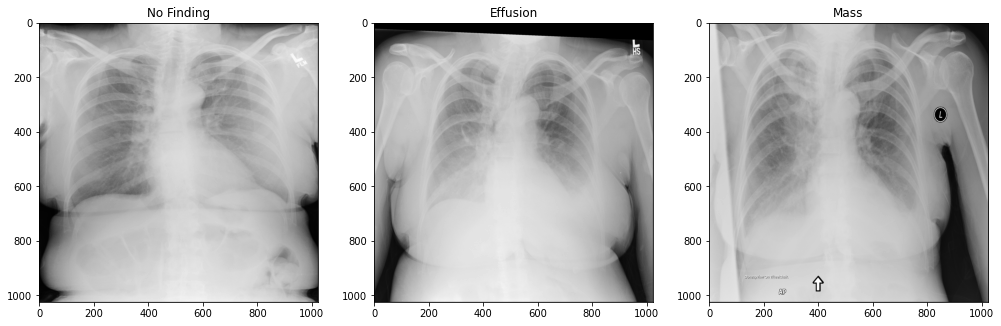

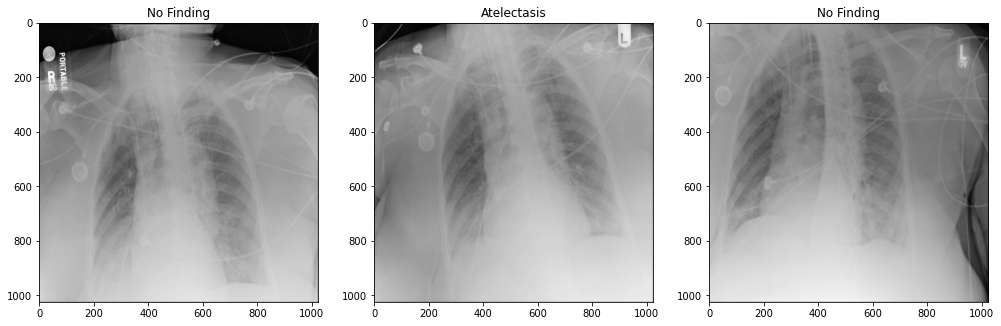

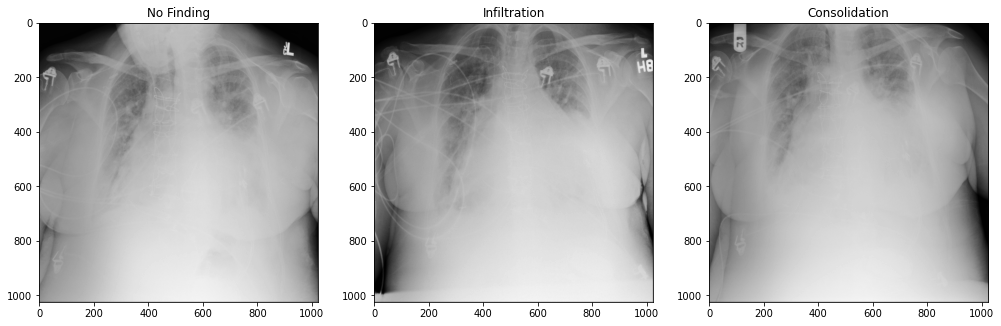

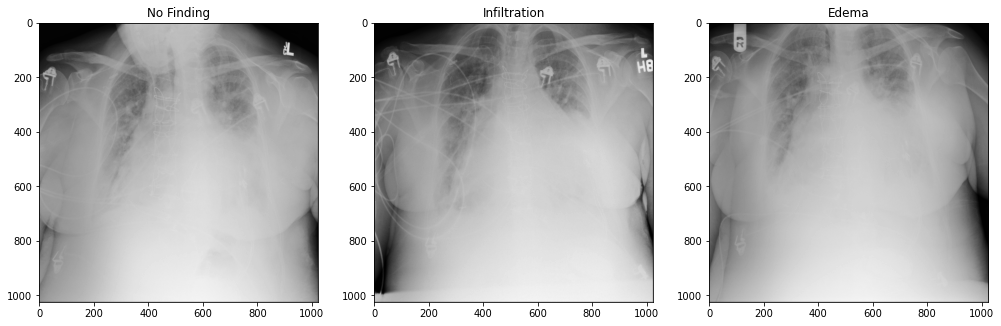

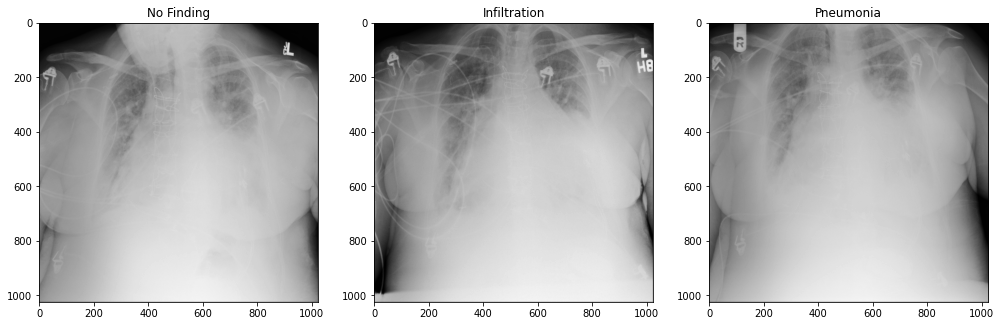

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# Credits to https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython
images1,images2 = 0,0
pd.set_option('max_rows', 99999)
# figure size in inches optional
rcParams['figure.figsize'] = 17 ,14
df_disease.reset_index(inplace = True, drop = True)
paths_array = []
finding_labels = []
count = 0

# Read in the 14 Sample sets with different labels and show the images in the same set side by side 
for index, row in df_disease.iterrows():
  path_images = '/content/drive/Shareddrives/ECS 289G Deep Learning Project/Project/Datasets/images'
  for folder in range(12):
    try:
      path = path_images + '/images' + str(folder+1)+'/'
      fake = mpimg.imread (path + row['Image Index'])
      finding_labels.append(row['Finding Labels'])
      paths_array.append(path + row['Image Index'])
      count += 1
      if count == 3:
        # read images
        img_A = mpimg.imread(paths_array[0])
        img_B = mpimg.imread(paths_array[1])
        img_C = mpimg.imread(paths_array[2])
        # display images
        fig, ax = plt.subplots(1,3)
        ax[0].set_title(finding_labels[0])
        ax[0].imshow(img_A,cmap='gray');
        ax[1].set_title(finding_labels[1])
        ax[1].imshow(img_B,cmap='gray');
        ax[2].set_title(finding_labels[2])
        ax[2].imshow(img_C,cmap='gray');
        paths_array = []
        finding_labels = []
        count = 0
      
    except:
      continue


